# 1 Problem Statement

“Our management is concerned with rising attrition in the company. We want to understand which employee segments are at higher risk of leaving, and why.Our job is to explore the data and provide clear insights and early warning indicators.”



# 2 Import Libraries & Load Dataset

In [4]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#setting
sns.set(style='whitegrid')
plt.style.use('ggplot')

In [92]:
#load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [93]:
#identify column that have same value for entire table and ids cloumn
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# 3. Data Profiling & Cleaning

In [94]:
#intial data overview
print('Shape:',df.shape)
print(df.info())

Shape: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

In [14]:
print(df['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [19]:
#missing values & data type
print(df.isnull().sum())
print(df.dtypes)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [95]:
#drop ID cloumn or Constant values
df.drop(columns=['EmployeeCount','Over18','EmployeeNumber','StandardHours'],inplace=True)

In [97]:
# Convert relevant columns to category
Categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in Categorical:
    df[col]=df[col].astype('category')

# 4. Univariate Analysis

Text(0.5, 1.0, 'Attrition Count')

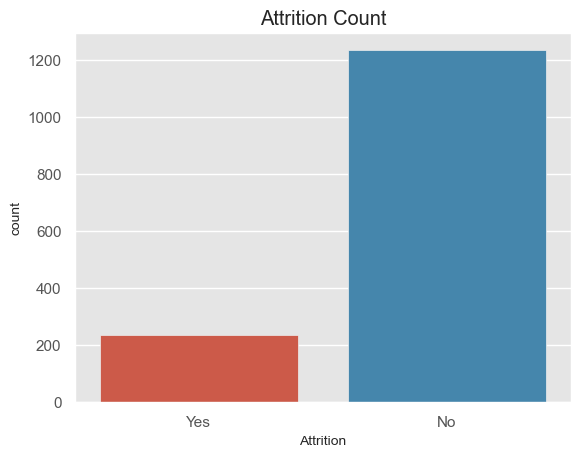

In [23]:
#Attrition Distribution
sns.countplot(data=df , x='Attrition')
plt.title('Attrition Count')

Text(0.5, 1.0, 'Age Distribution')

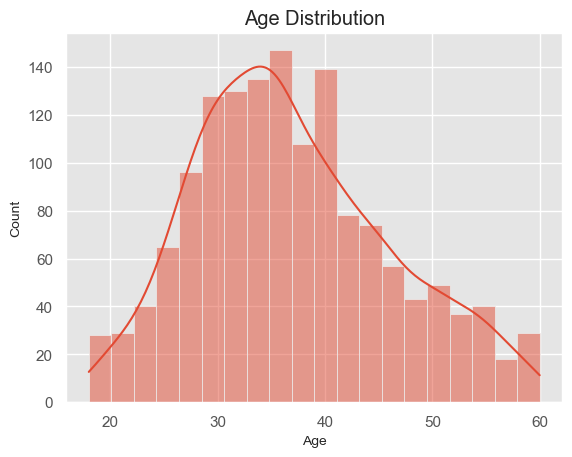

In [106]:
# Age Distribution
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Age Distribution')

# 5. Bivariate Analysis (Business Hypotheses)


Text(0.5, 1.0, 'Age vs Attrition')

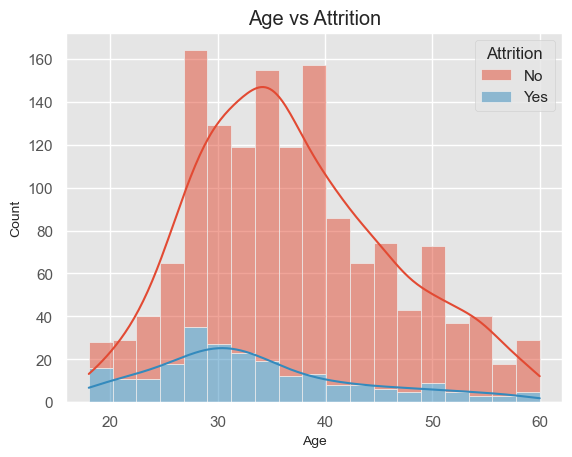

In [107]:
# Attrition by Age
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack')
plt.title("Age vs Attrition")


Text(0.5, 1.0, 'Overtime vs Attrition')

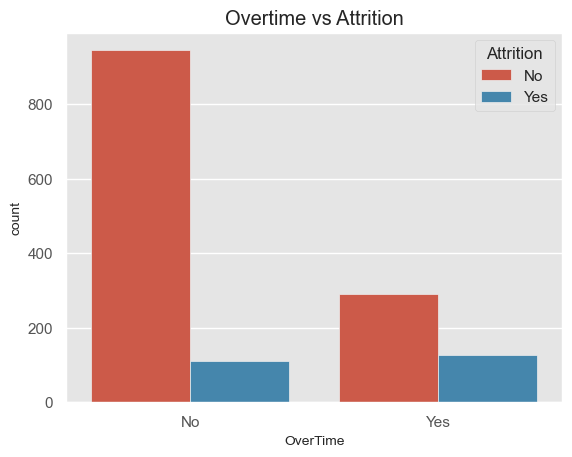

In [108]:
# Attrition by Overtime
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Overtime vs Attrition")

In [28]:
print(df.groupby('Attrition')[['Age', 'JobSatisfaction', 'MonthlyIncome']].mean())

                 Age  JobSatisfaction  MonthlyIncome
Attrition                                           
No         37.561233         2.778589    6832.739659
Yes        33.607595         2.468354    4787.092827


(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

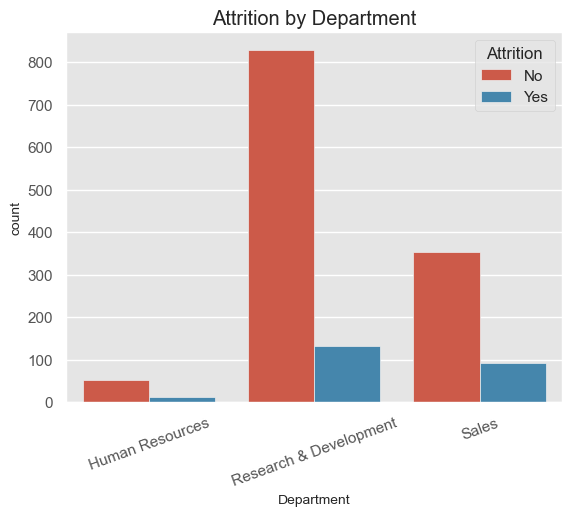

In [109]:
# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

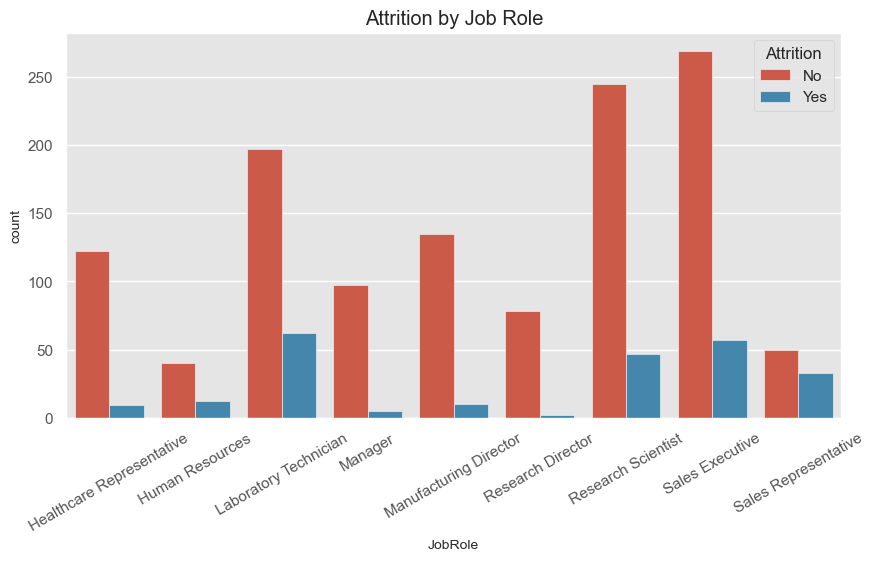

In [110]:
# Attrition by Job Role
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=30)

# 6. Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

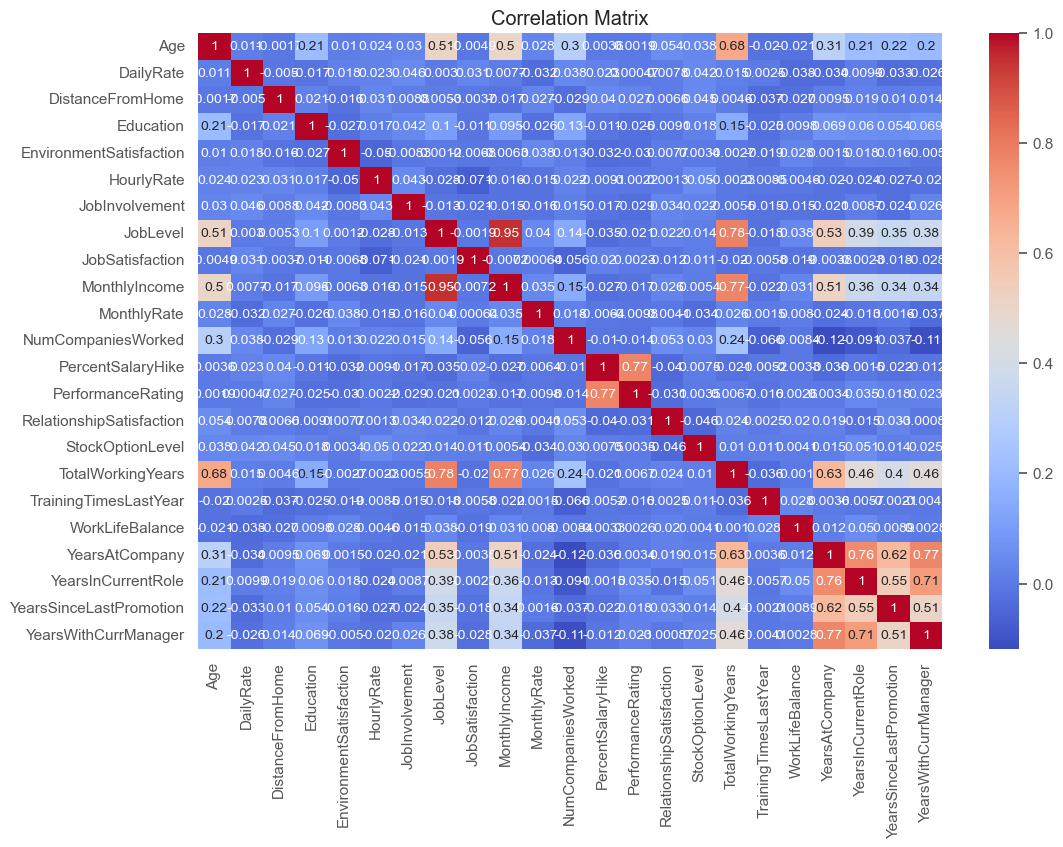

In [111]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

# Attrition rate per Age Group

<Axes: title={'center': 'Attrition Rate by Age Group'}, xlabel='AgeGroup', ylabel='count'>

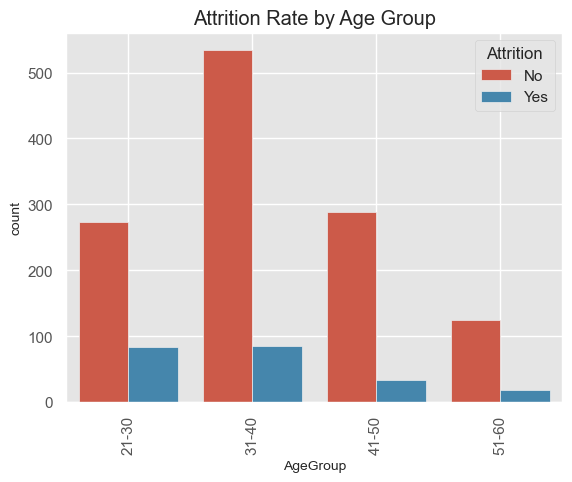

In [112]:
# Binning ages
bins = [20, 30, 40, 50, 60]
labels = ['21-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Attrition by AgeGroup
sns.countplot(x='AgeGroup', hue='Attrition', data=df)
plt.title("Attrition by Age Group")

# Attrition rate per age group
age_attrition = df.groupby(['AgeGroup', 'Attrition']).size().unstack()
age_attrition['AttritionRate'] = age_attrition['Yes'] / (age_attrition['Yes'] + age_attrition['No'])
age_attrition['AttritionRate'].plot(kind='bar', color='salmon', title="Attrition Rate by Age Group")


# 8. Key Insights

- 🔹 Young employees (21–30) are at highest risk of attrition.
- 🔹 Employees working overtime are 2x more likely to leave.
- 🔹 Sales Executives and Lab Technicians are most likely to resign.
- 🔹 Low income and low job satisfaction are strong attrition drivers.

# 9. Business Recommendations

1. Launch mentoring & fast-track career programs for <30 age group.
2. Reduce mandatory overtime in high-churn roles like Sales.
3. Introduce real-time engagement feedback tools for satisfaction monitoring.
4. Build a monthly dashboard to track attrition-linked KPIs.

## More deep Analysis

###  Promotion Velocity Feature
1. Are employees with low promotion velocity more likely to leave?

Text(0.5, 1.0, 'Years per Promotion vs Attrition')

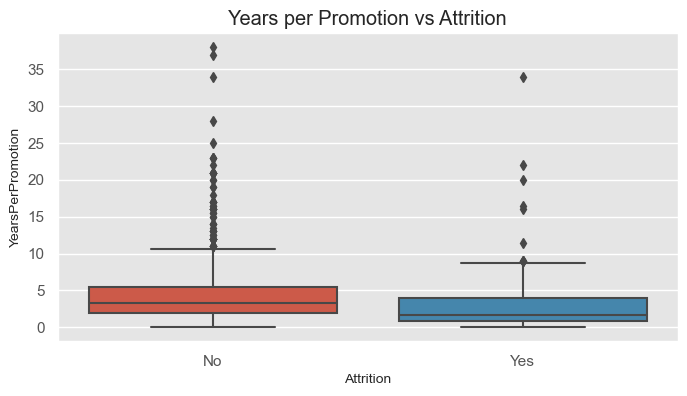

In [114]:
df['YearsPerPromotion'] = df['TotalWorkingYears'] / (df['NumCompaniesWorked'] + 1)

# Visualize
plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='YearsPerPromotion', data=df)
plt.title("Years per Promotion vs Attrition")

### Attrition Rate by Job Role

Text(0.5, 0, 'Attrition Rate')

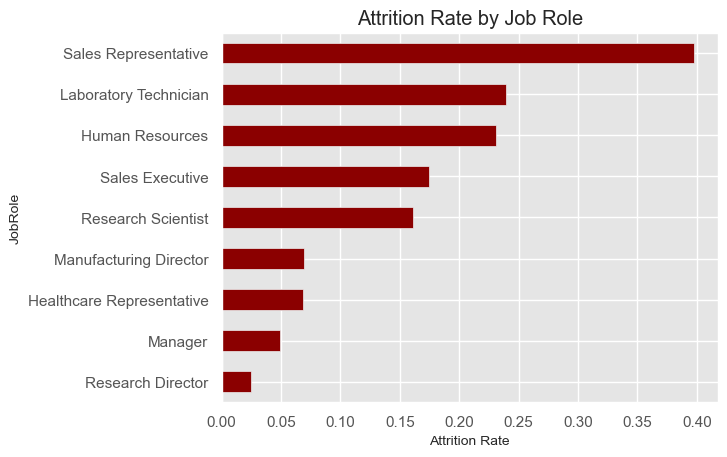

In [115]:
role_attr = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
role_attr['Yes'].sort_values().plot(kind='barh', color='darkred')
plt.title("Attrition Rate by Job Role")
plt.xlabel("Attrition Rate")

### Tenure vs Attrition (Years at Company)

Text(0.5, 1.0, 'Years at Company vs Attrition')

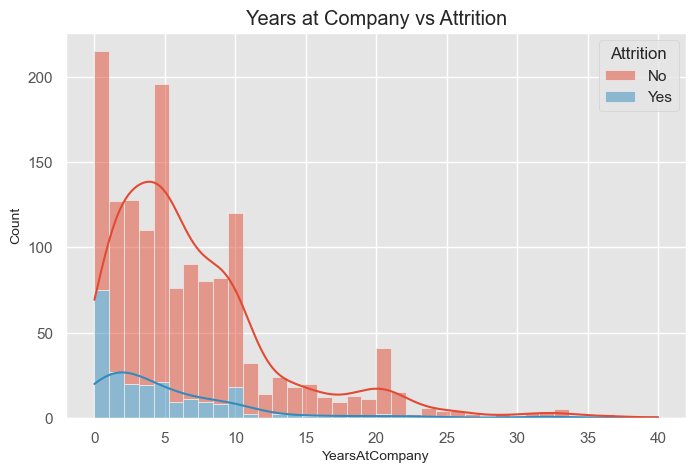

In [116]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True)
plt.title("Years at Company vs Attrition")

### Satisfaction Index

Text(0.5, 1.0, 'Satisfaction Index vs Attrition')

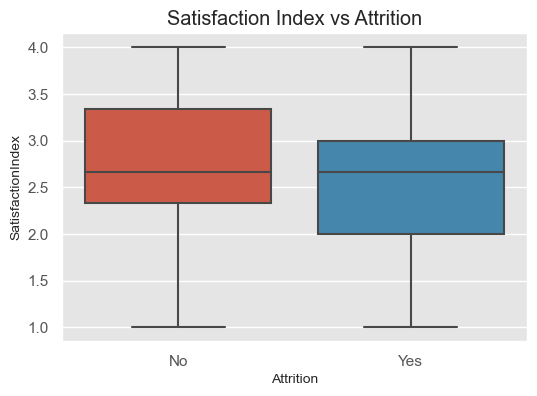

In [118]:
# Combine satisfaction scores
df['SatisfactionIndex'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

# Visualize
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='SatisfactionIndex', data=df)
plt.title("Satisfaction Index vs Attrition")


# High-Risk Flag (Binary Classification)

Text(0.5, 1.0, 'High Risk Flag vs Attrition')

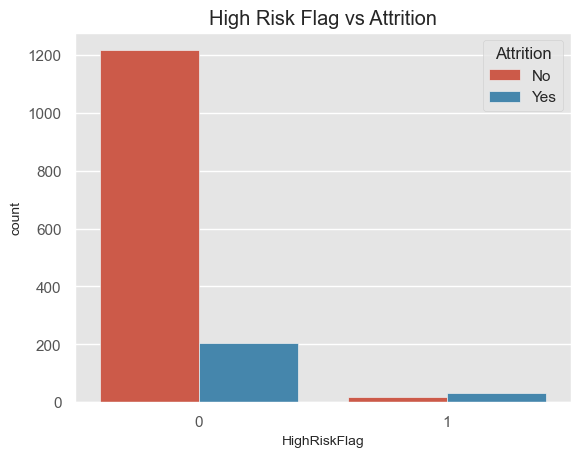

In [119]:
df['HighRiskFlag'] = np.where(
    (df['OverTime'] == 'Yes') &
    (df['MonthlyIncome'] < 4000) &
    (df['SatisfactionIndex'] < 2.5), 1, 0
)

# Check distribution
sns.countplot(x='HighRiskFlag', hue='Attrition', data=df)
plt.title("High Risk Flag vs Attrition")